# 3.1.1 ETS

## 이동 평균 평활화

### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import statsmodels.api as sm

### 데이터 전처리

In [2]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
australia_exports = global_economy[global_economy['Country'] == 'Australia']

### 시각화

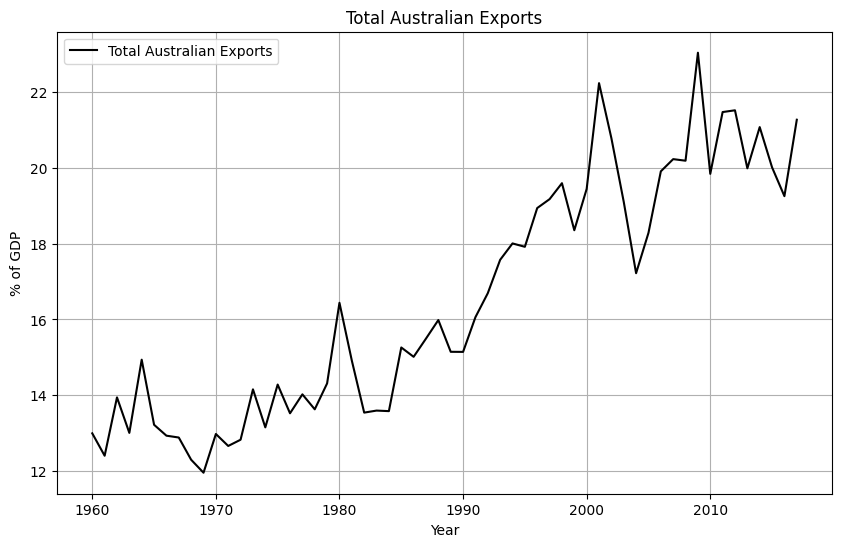

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports')
plt.grid(True)
plt.legend()
plt.show()

### MA

In [4]:
australia_exports['3-MA'] = australia_exports['Exports'].rolling(window=3, center=True).mean()
australia_exports['5-MA'] = australia_exports['Exports'].rolling(window=5, center=True).mean()
australia_exports['7-MA'] = australia_exports['Exports'].rolling(window=7, center=True).mean()
australia_exports['9-MA'] = australia_exports['Exports'].rolling(window=9, center=True).mean()

### MA 시각화

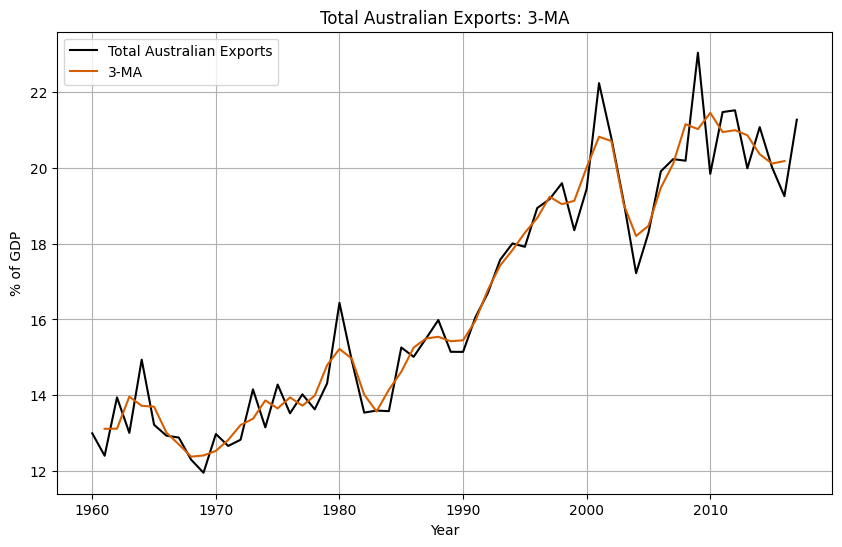

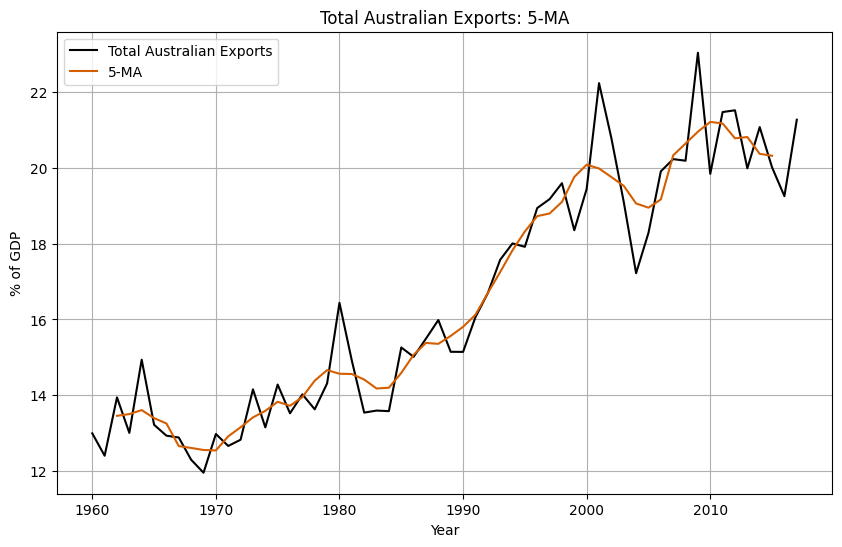

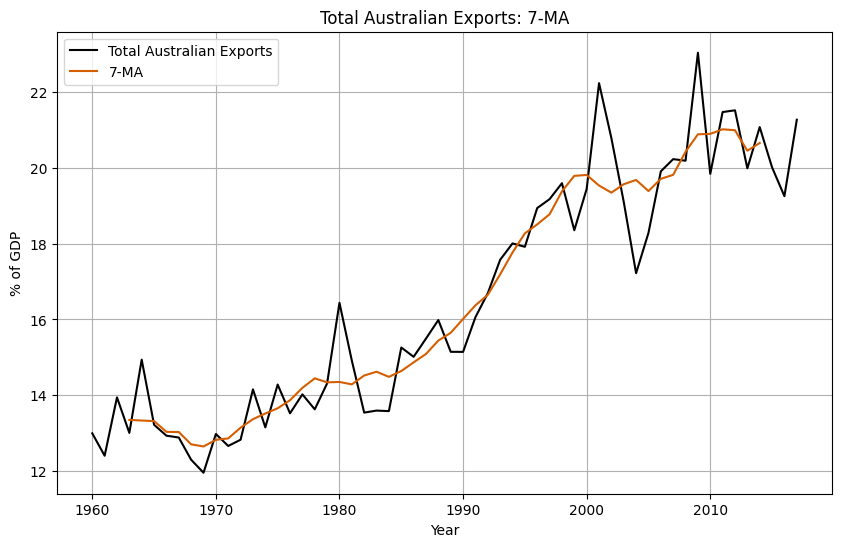

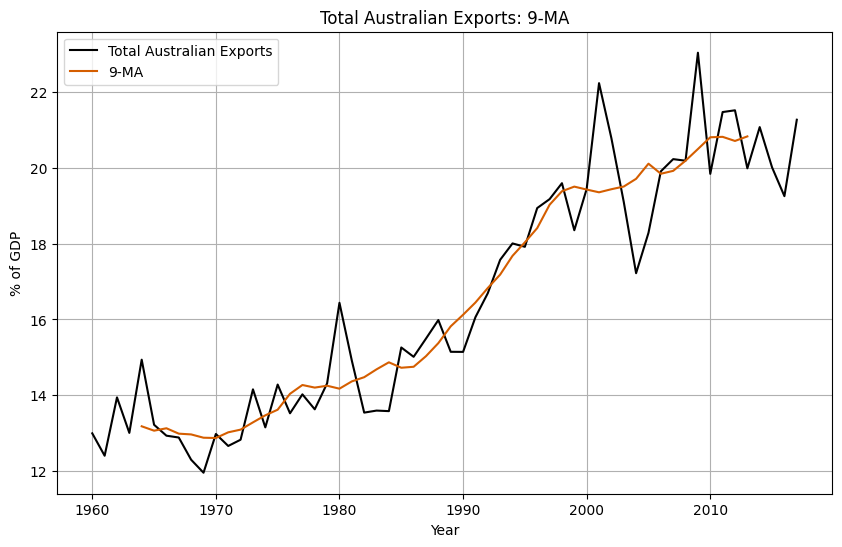

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['3-MA'], label='3-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 3-MA')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['5-MA'], label='5-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 5-MA')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['7-MA'], label='7-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 7-MA')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(australia_exports['Year'], australia_exports['Exports'], label='Total Australian Exports', color='black')
plt.plot(australia_exports['Year'], australia_exports['9-MA'], label='9-MA', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Total Australian Exports: 9-MA')
plt.grid(True)
plt.legend()
plt.show()

## ETS

### 데이터

In [6]:
algeria_exports = global_economy[global_economy['Country'] == 'Algeria']
algeria_series = pd.Series(list(algeria_exports['Exports']), algeria_exports['Year'])

### 모델 피팅

In [7]:
fit = ETSModel(algeria_series).fit()

### 예측

In [8]:
forecast = fit.forecast(5)
ci = fit.get_prediction(start = forecast.index[0], end = forecast.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

### 시각화

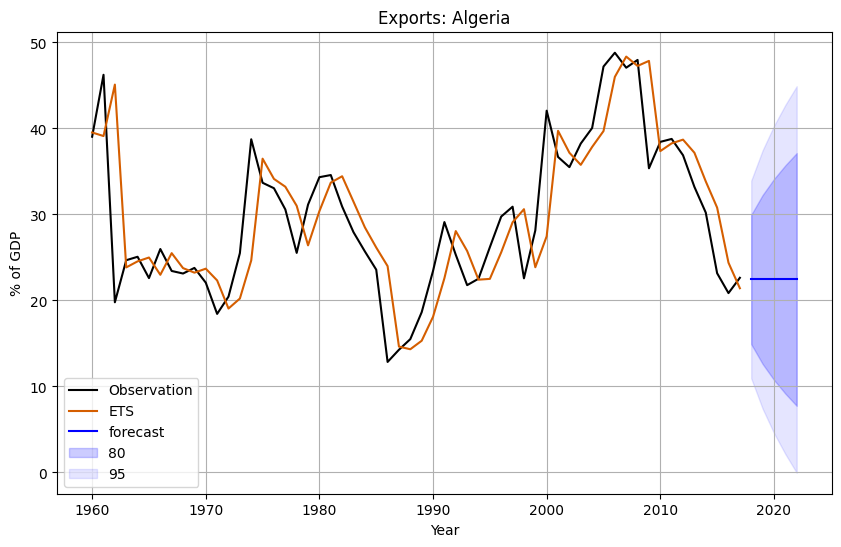

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(algeria_series, label='Observation', color='black')
plt.plot(fit.fittedvalues, label='ETS', color='#D55E00')
plt.plot(forecast, label='forecast', color='b')
plt.fill_between(forecast.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.title('Exports: Algeria')
plt.grid(True)
plt.legend()
plt.show()

## Holt

### 데이터 

In [10]:
australia_economy = global_economy[global_economy['Country'] == 'Australia']
australia_pop = australia_economy[['Population', 'Year']]
pop_series = pd.Series(list(australia_pop['Population']), australia_pop['Year'])

### 모델 피팅(Holt)

In [11]:
fit_pop1 = ETSModel(pop_series, trend='add').fit()
fit_pop2 = ETSModel(pop_series, trend='add', damped_trend=True).fit_constrained({"damping_trend": 0.9})

### 예측

In [12]:
forecast_pop1 = fit_pop1.forecast(15)
forecast_pop2 = fit_pop2.forecast(15)

### 시각화

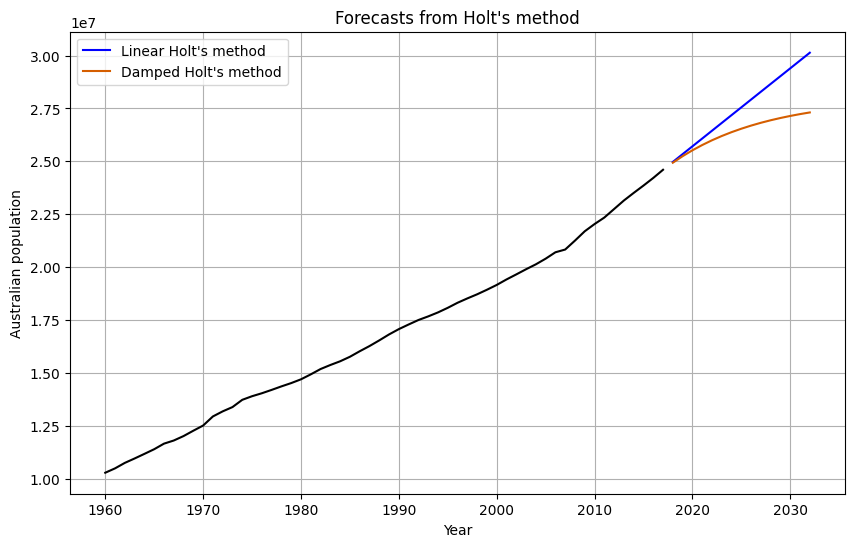

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(pop_series,  color='black')
plt.plot(forecast_pop1, label='Linear Holt\'s method', color='b')
plt.plot(forecast_pop2, label='Damped Holt\'s method', color='#D55E00')
plt.xlabel('Year')
plt.ylabel('Australian population')
plt.title('Forecasts from Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

## Damp Holt

### 데이터 

In [14]:
www_usage = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/WWWusage.csv')
www_series = pd.Series(list(map(float,www_usage['value'])), www_usage['time'])

### 모델 피팅

In [15]:
fit_www = ETSModel(www_series, trend='add', damped_trend=True).fit()

### 예측

In [16]:
forecast_www = fit_www.forecast(10)
ci = fit_www.get_prediction(start = forecast_www.index[0], end = forecast_www.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

### 시각화

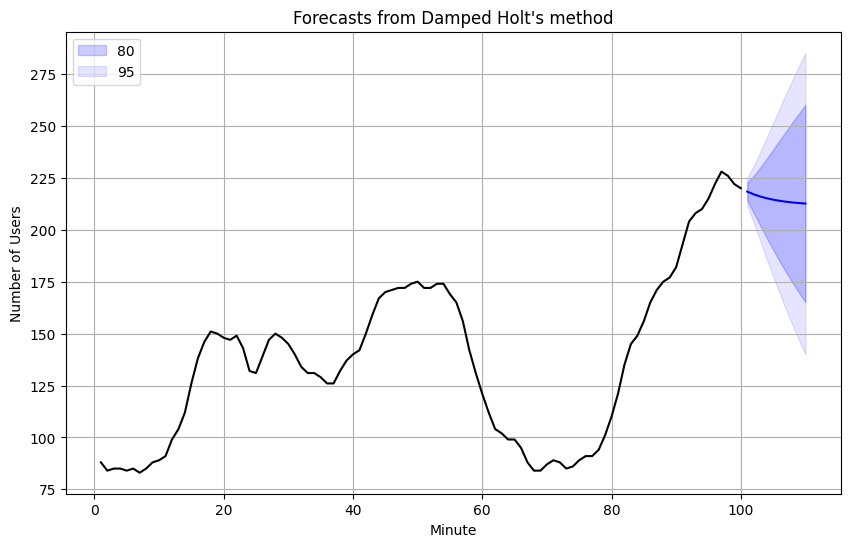

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(www_series, color='black')
plt.plot(forecast_www.index+1, forecast_www.values, color='b')
plt.fill_between(forecast_www.index+1, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast_www.index+1, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Minute')
plt.ylabel('Number of Users')
plt.title('Forecasts from Damped Holt\'s method')
plt.grid(True)
plt.legend()
plt.show()

## Holt-Winter Additive

### 데이터

In [18]:
pbs = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/PBS.csv")
pbs = pbs[pbs["ATC2"] == 'J07']
pbs_series = pd.Series(list(pbs['Cost'][:204]), pd.date_range(start='1/1/1984', periods=204, freq='1MS'))

### 모델 피팅

In [19]:
fit_pbs1 = ETSModel(pbs_series, seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.00})
fit_pbs2 = ETSModel(pbs_series, seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 0.72})
fit_pbs3 = ETSModel(pbs_series, seasonal='add', seasonal_periods=12).fit_constrained({"smoothing_seasonal": 1.00})

### 시각화

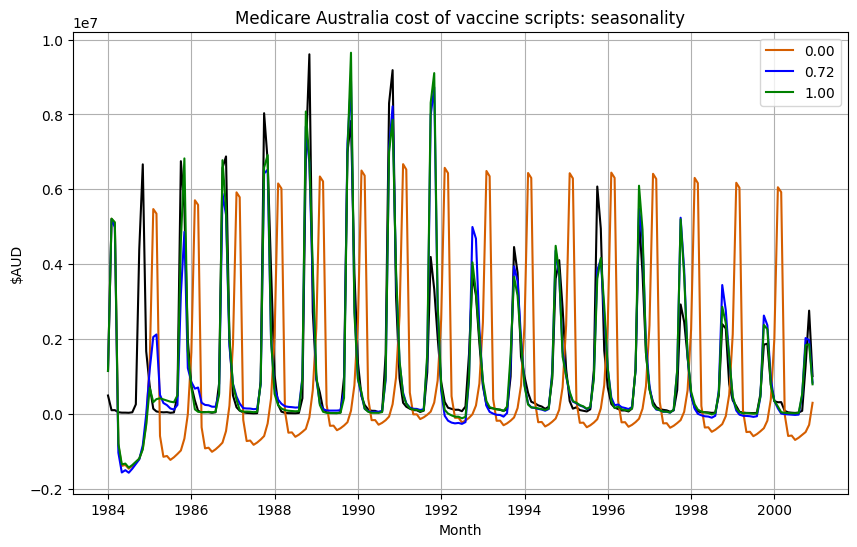

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(pbs_series,  color='black')
plt.plot(fit_pbs1.fittedvalues, label='0.00', color='#D55E00')
plt.plot(fit_pbs2.fittedvalues, label='0.72', color='b')
plt.plot(fit_pbs3.fittedvalues, label='1.00', color='green')
plt.xlabel('Month')
plt.ylabel('$AUD')
plt.title('Medicare Australia cost of vaccine scripts: seasonality')
plt.grid(True)
plt.legend()
plt.show()

## Holt-Winter Multiplicative

### 데이터

In [21]:
tourism = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/tourism.csv")
tourism = tourism[tourism["Purpose"] == "Holiday"]
tourism = tourism[["Quarter", "Trips"]]
tourism = tourism.groupby("Quarter").sum()
tour_series = pd.Series(list(tourism['Trips']), pd.date_range(start='2/3/1998', periods=80, freq='3MS'))

### 모델 피팅

In [22]:
fit_tour1 = ETSModel(tour_series, error='add', trend='add', seasonal='add').fit()
fit_tour2 = ETSModel(tour_series, error='mul', trend='add', seasonal='mul').fit()

### 예측

In [23]:
forecast_tour1 = fit_tour1.forecast(12)
forecast_tour2 = fit_tour2.forecast(12)

### 시각화

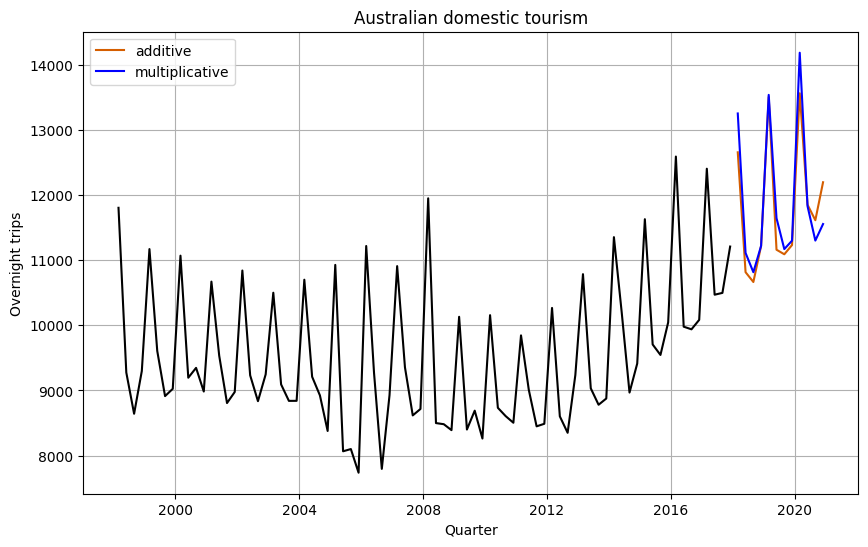

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(tour_series,  color='black')
plt.plot(forecast_tour1, label='additive', color='#D55E00')
plt.plot(forecast_tour2, label='multiplicative', color='b')
plt.xlabel('Quarter')
plt.ylabel('Overnight trips')
plt.title('Australian domestic tourism')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
print(f"AAA: alpha = {fit_tour1.smoothing_level}, beta = {fit_tour1.smoothing_trend}, gamma = {fit_tour1.smoothing_seasonal}")
print(f"MAM: alpha = {fit_tour2.smoothing_level}, beta = {fit_tour2.smoothing_trend}, gamma = {fit_tour2.smoothing_seasonal}")

AAA: alpha = 0.0862311636075922, beta = 0.013207082672533428, gamma = 0.6862539958148963
MAM: alpha = 0.383012846753179, beta = 0.01776891063302199, gamma = 6.16987153246821e-05


# 3.1.2 State space models for ETS models

### 모델 피팅

In [26]:
fit_tour3 = ETSModel(tour_series, error='add', trend=None, seasonal='add').fit()

### 예측

In [27]:
forecast_tour3 = fit_tour3.forecast(8)
ci = fit_tour3.get_prediction(start = forecast_tour3.index[0], end = forecast_tour3.index[-1])
lower_ci80 = ci.pred_int(alpha=0.2).iloc[:,0]
upper_ci80 = ci.pred_int(alpha=0.2).iloc[:,1]
lower_ci95 = ci.pred_int(alpha=0.05).iloc[:,0]
upper_ci95 = ci.pred_int(alpha=0.05).iloc[:,1]

### 시각화

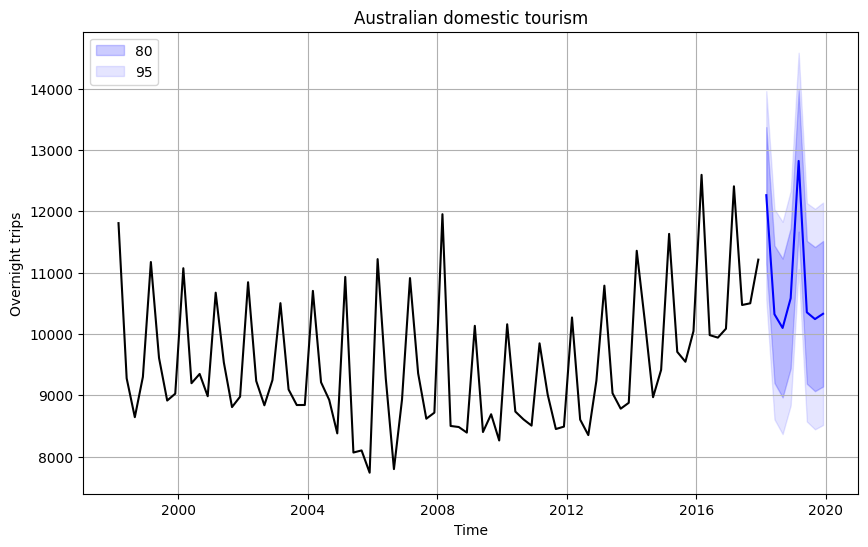

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tour_series, color='black')
plt.plot(forecast_tour3.index, forecast_tour3.values, color='b')
plt.fill_between(forecast_tour3.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast_tour3.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel('Time')
plt.ylabel('Overnight trips')
plt.title('Australian domestic tourism')
plt.grid(True)
plt.legend()
plt.show()

# 3.1.3 Prophet

## Prophet

### 필요한 패키지 불러오기

In [29]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

### 데이터

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

### 모델 피팅

In [31]:
pro = Prophet(changepoint_prior_scale=0.05)
pro.fit(df)

17:54:01 - cmdstanpy - INFO - Chain [1] start processing
17:54:01 - cmdstanpy - INFO - Chain [1] done processing


### 예측

In [32]:
future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

### 시각화

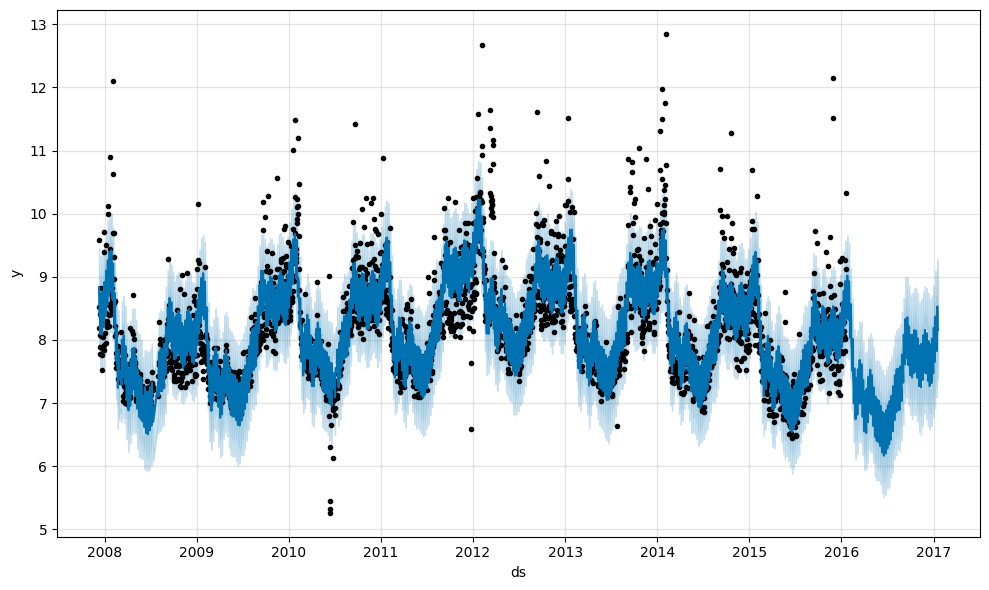

In [33]:
fig1 = pro.plot(forecast)

### 분해 시각화

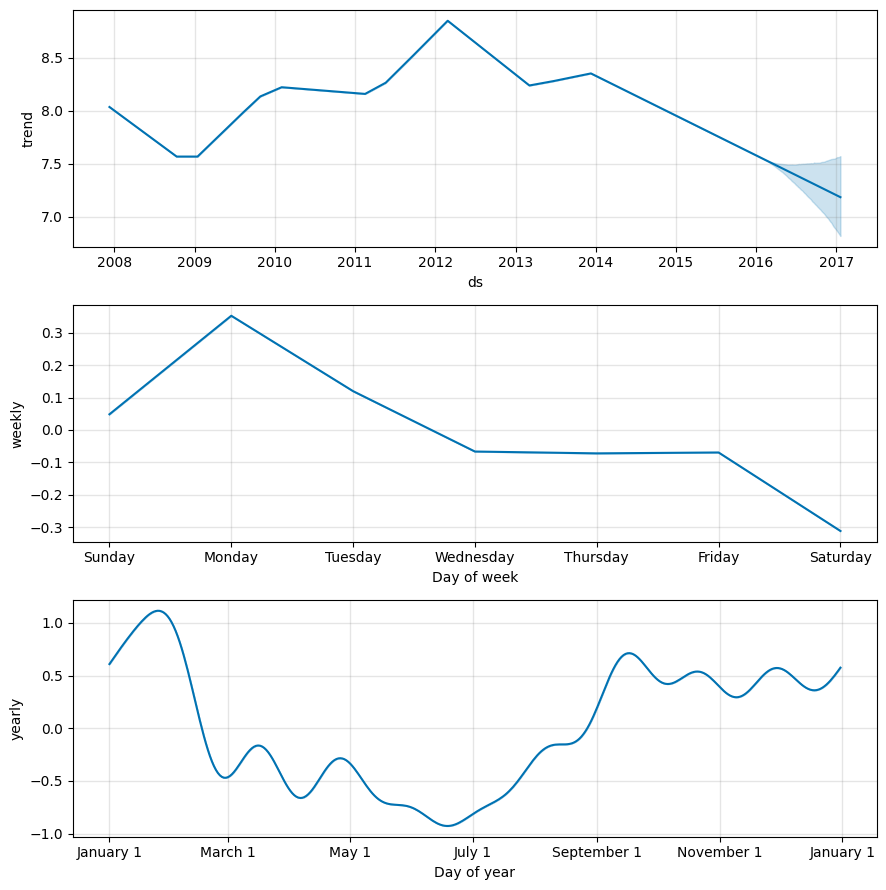

In [34]:
fig2 = pro.plot_components(forecast)

## 추세

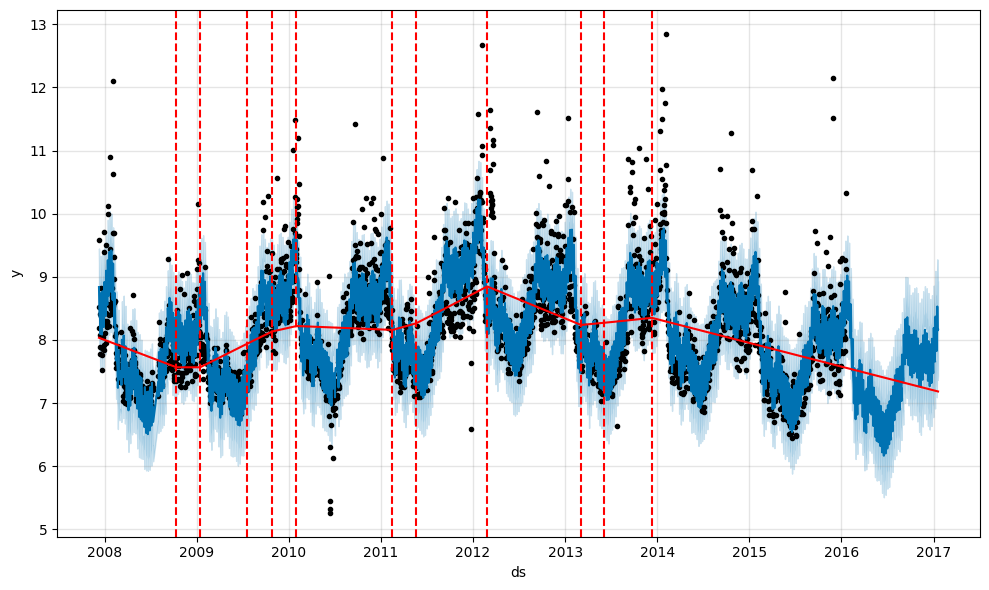

In [35]:
fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

17:54:03 - cmdstanpy - INFO - Chain [1] start processing
17:54:04 - cmdstanpy - INFO - Chain [1] done processing


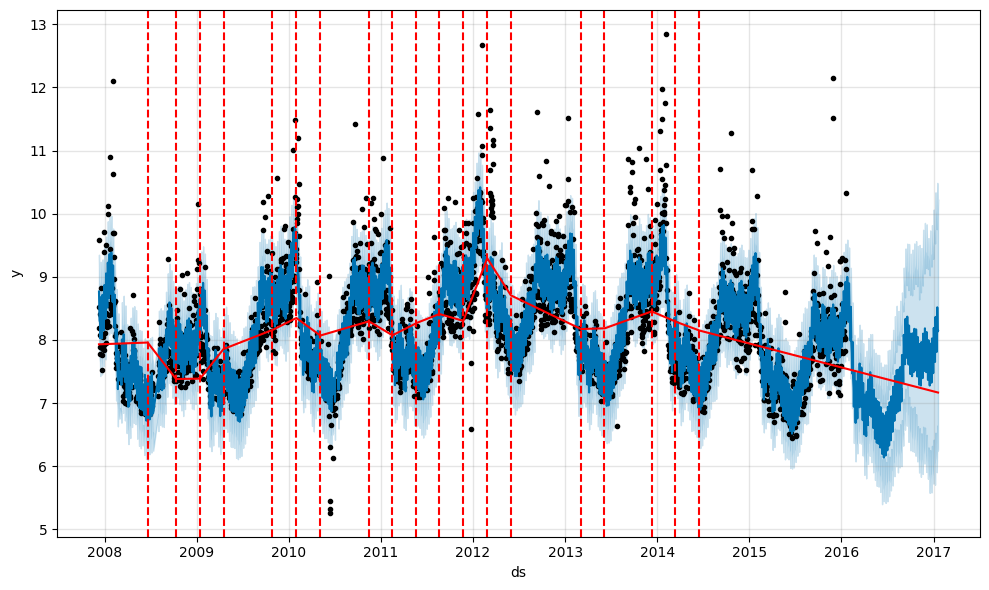

In [36]:
pro = Prophet(changepoint_prior_scale=0.3)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro, forecast)

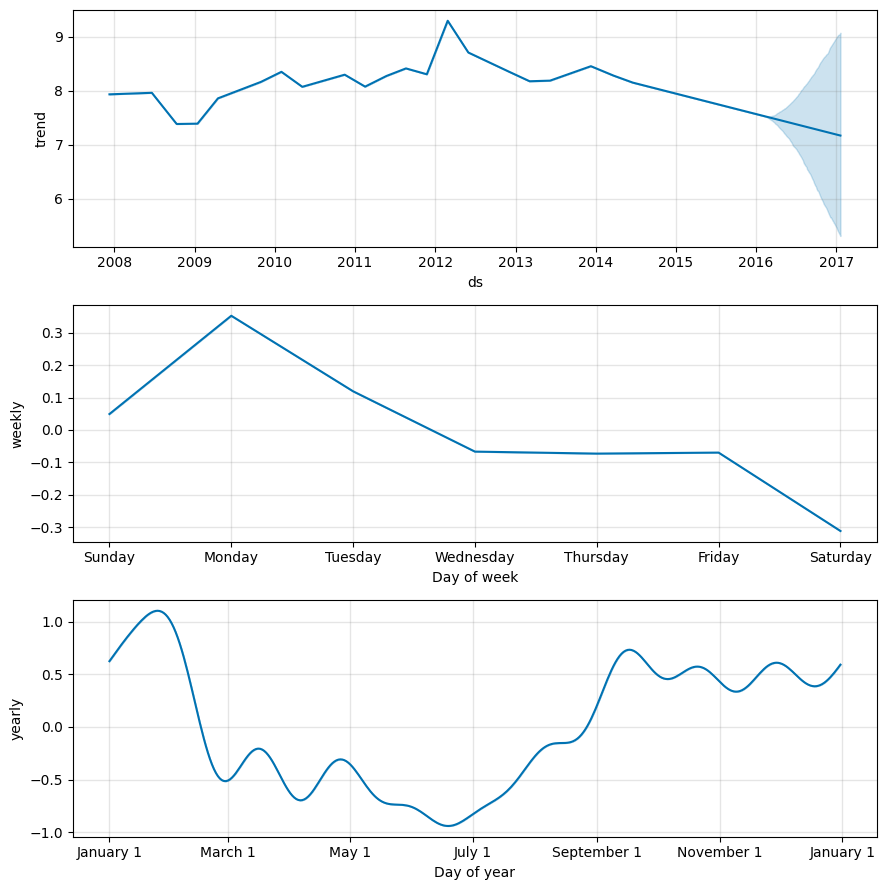

In [37]:
fig2 = pro.plot_components(forecast)

## 계절성

17:54:06 - cmdstanpy - INFO - Chain [1] start processing
17:54:06 - cmdstanpy - INFO - Chain [1] done processing


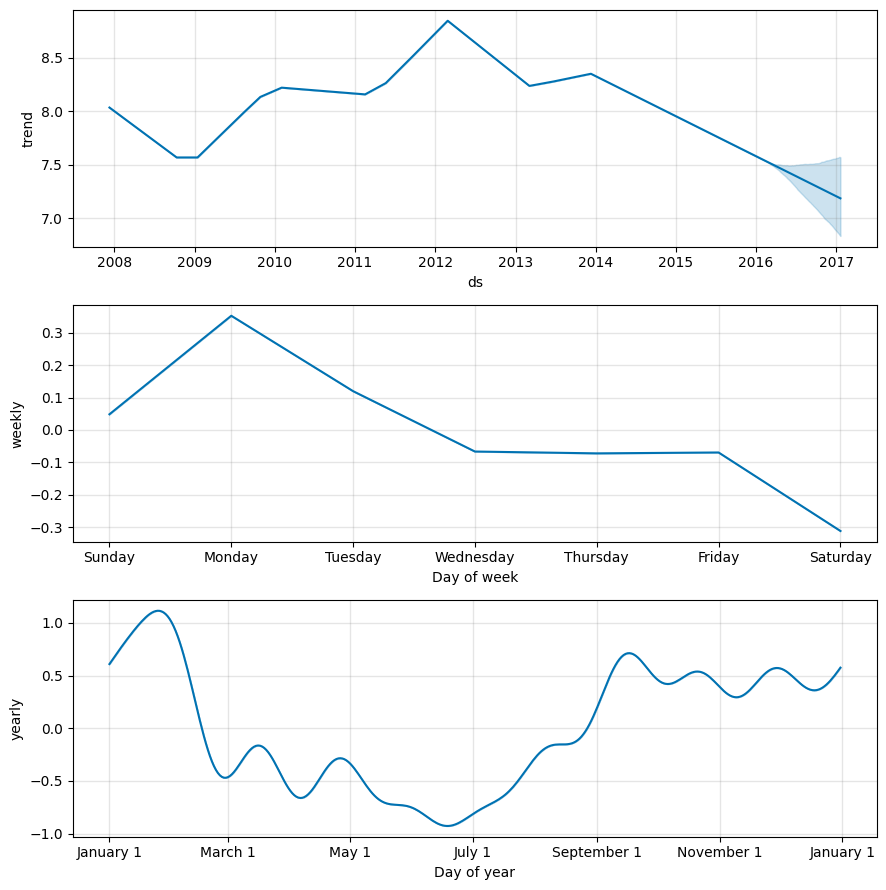

In [38]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

17:54:08 - cmdstanpy - INFO - Chain [1] start processing
17:54:08 - cmdstanpy - INFO - Chain [1] done processing


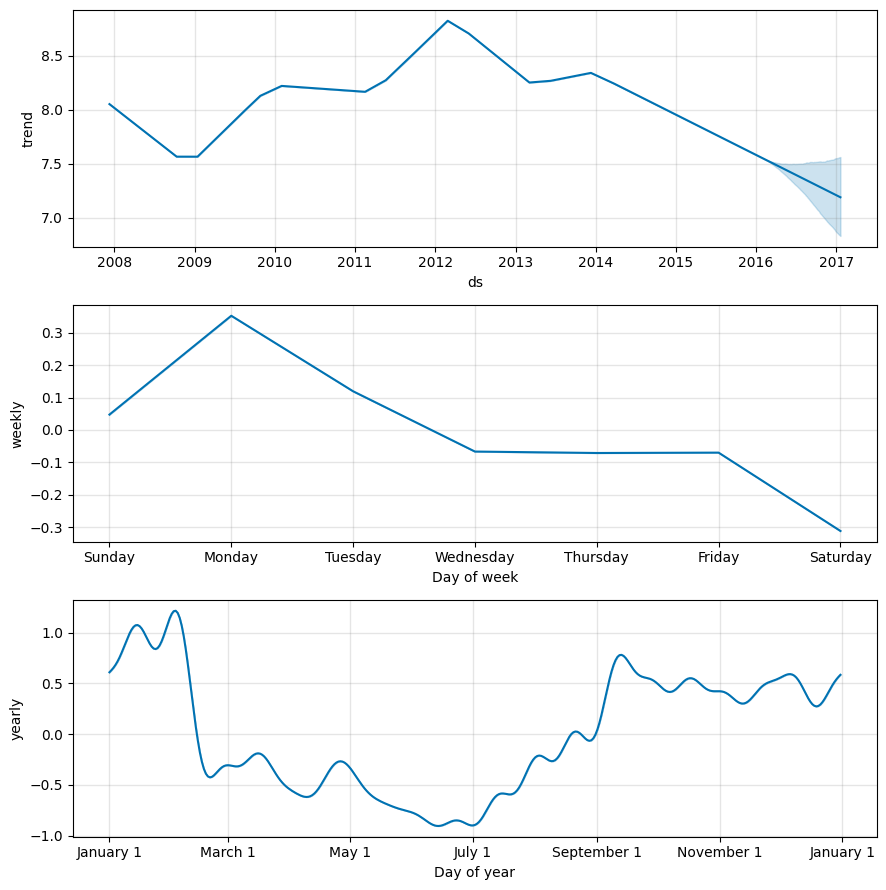

In [39]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=20,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

17:54:10 - cmdstanpy - INFO - Chain [1] start processing
17:54:10 - cmdstanpy - INFO - Chain [1] done processing


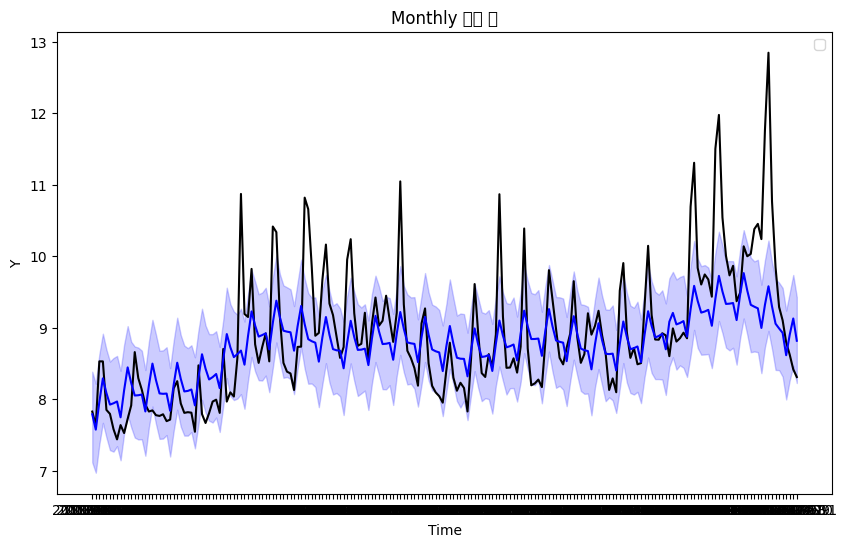

In [40]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly 추가 전')
plt.legend()
plt.show()

17:54:12 - cmdstanpy - INFO - Chain [1] start processing
17:54:12 - cmdstanpy - INFO - Chain [1] done processing


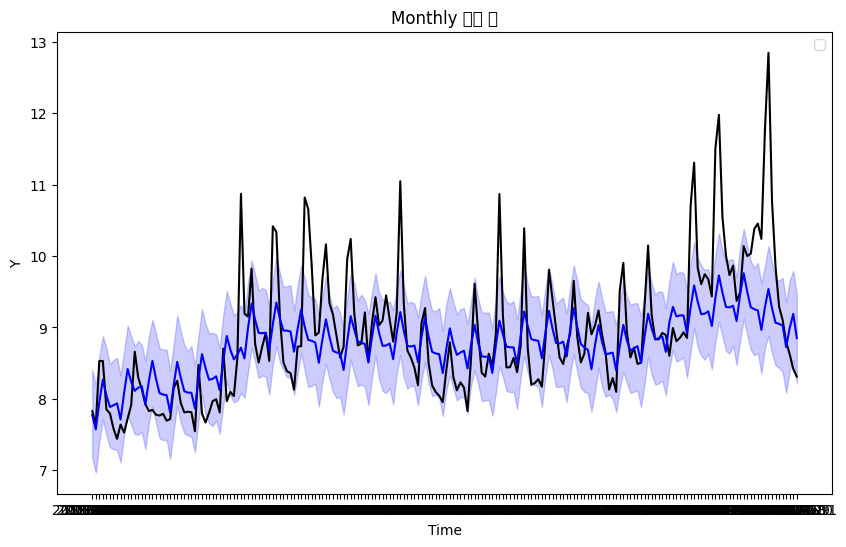

In [41]:
pro = Prophet(
    changepoint_prior_scale=0.05,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.add_seasonality(name='monthly', period=30.5, fourier_order=5)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[2000:2200]
plt.figure(figsize=(10, 6))
plt.plot(df[2000:2200].ds, df[2000:2200].y, color='black')
plt.plot(df[2000:2200].ds, tmp.yhat, color='b')
plt.fill_between(df[2000:2200].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Monthly 추가 후')
plt.legend()
plt.show()

17:54:14 - cmdstanpy - INFO - Chain [1] start processing
17:54:16 - cmdstanpy - INFO - Chain [1] done processing


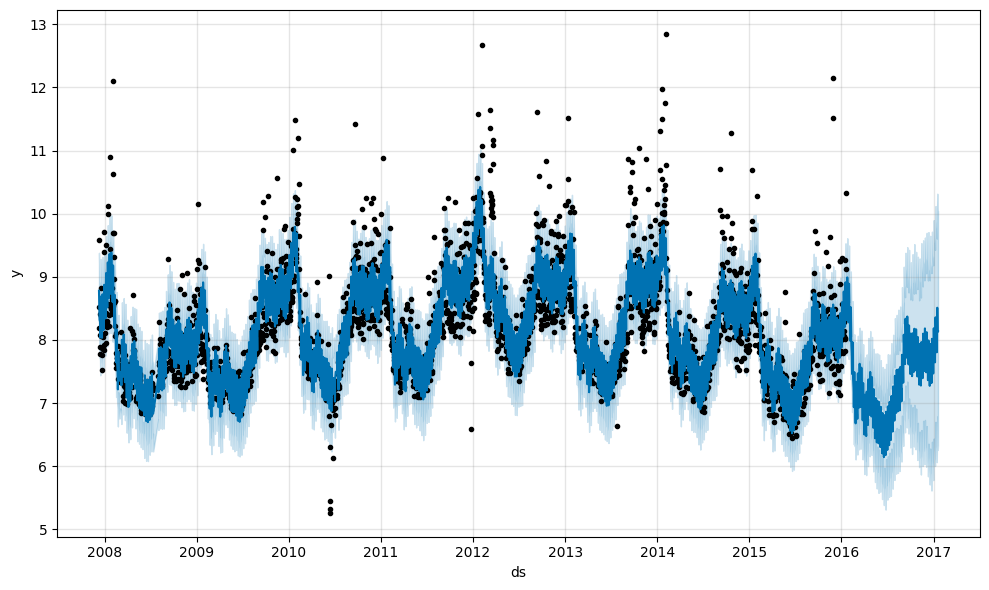

In [42]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

17:54:17 - cmdstanpy - INFO - Chain [1] start processing
17:54:18 - cmdstanpy - INFO - Chain [1] done processing


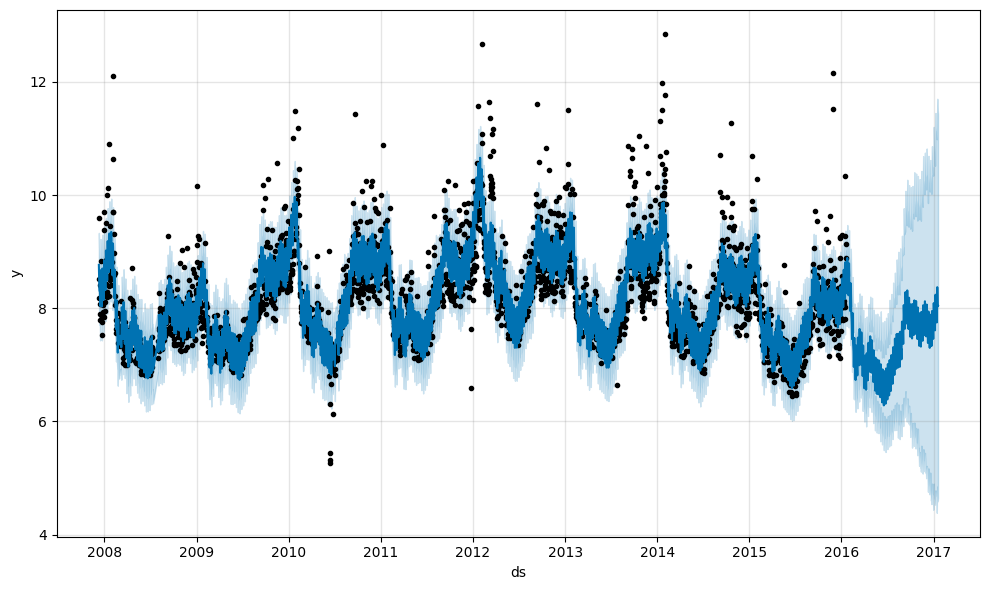

In [43]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot(forecast)

## 휴일효과

17:54:19 - cmdstanpy - INFO - Chain [1] start processing
17:54:21 - cmdstanpy - INFO - Chain [1] done processing


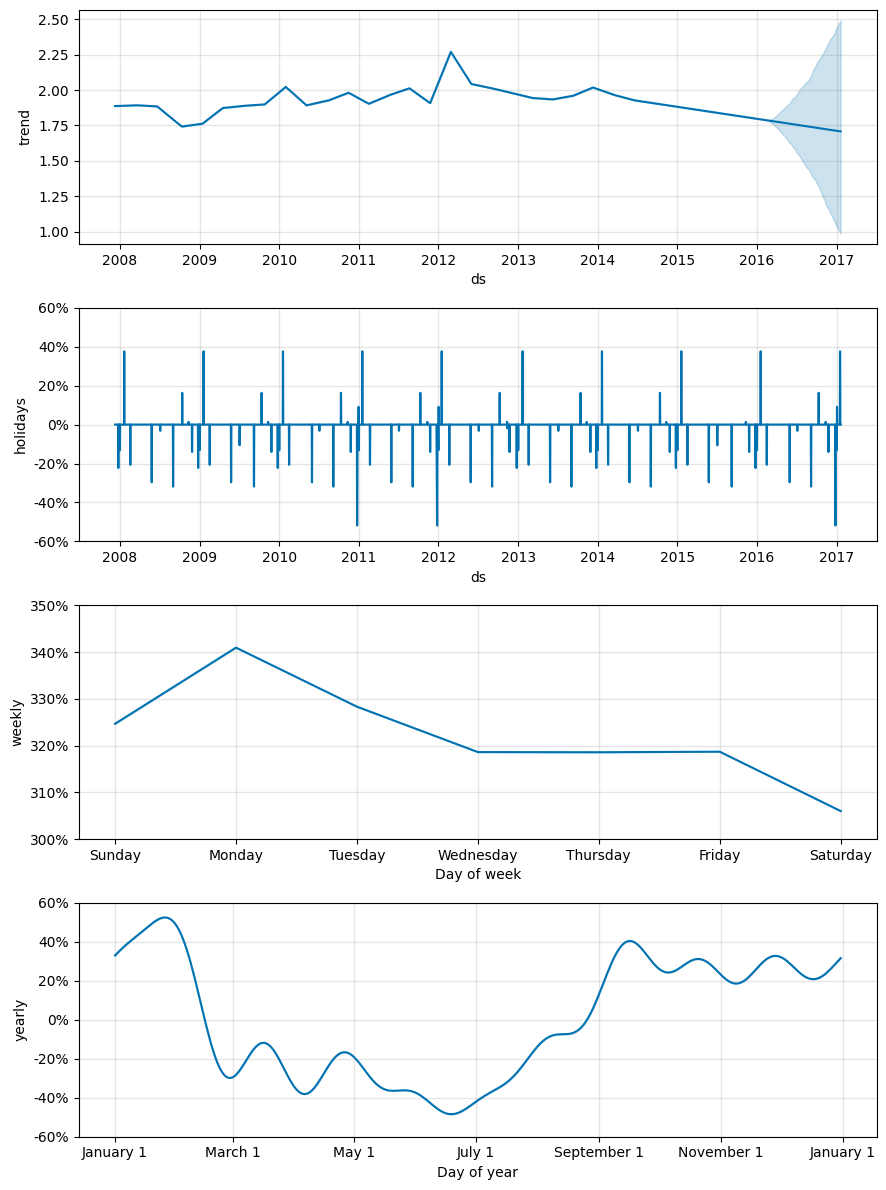

In [44]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

fig = pro.plot_components(forecast)

17:54:23 - cmdstanpy - INFO - Chain [1] start processing
17:54:24 - cmdstanpy - INFO - Chain [1] done processing


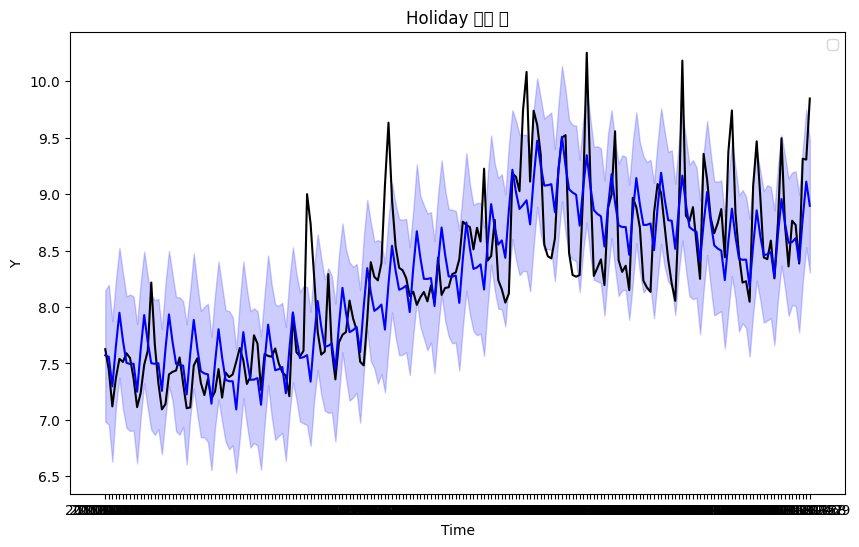

In [45]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday 추가 전')
plt.legend()
plt.show()

17:54:26 - cmdstanpy - INFO - Chain [1] start processing
17:54:28 - cmdstanpy - INFO - Chain [1] done processing


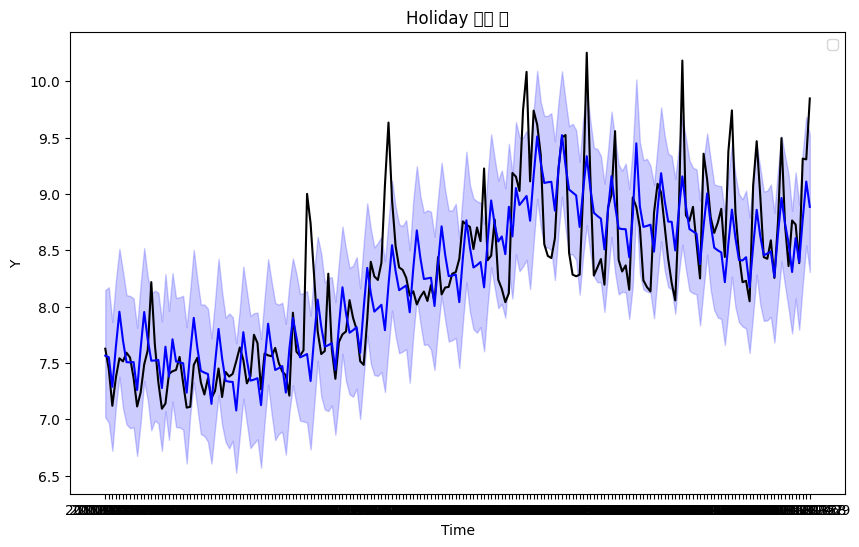

In [46]:
pro = Prophet(
    changepoint_prior_scale=0.3,
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
pro.add_country_holidays(country_name='US')
pro.fit(df)

future = pro.make_future_dataframe(periods=365)
forecast = pro.predict(future)

tmp = forecast[1200:1400]
plt.figure(figsize=(10, 6))
plt.plot(df[1200:1400].ds, df[1200:1400].y, color='black')
plt.plot(df[1200:1400].ds, tmp.yhat, color='b')
plt.fill_between(df[1200:1400].ds, tmp.yhat_lower, tmp.yhat_upper, color='b', alpha=.2)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Holiday 추가 후')
plt.legend()
plt.show()

## 전기 수요

17:54:34 - cmdstanpy - INFO - Chain [1] start processing
17:55:06 - cmdstanpy - INFO - Chain [1] done processing


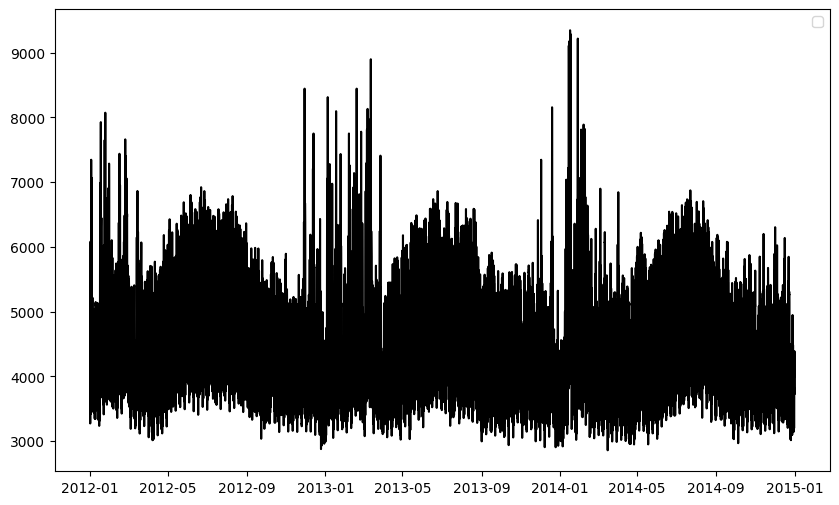

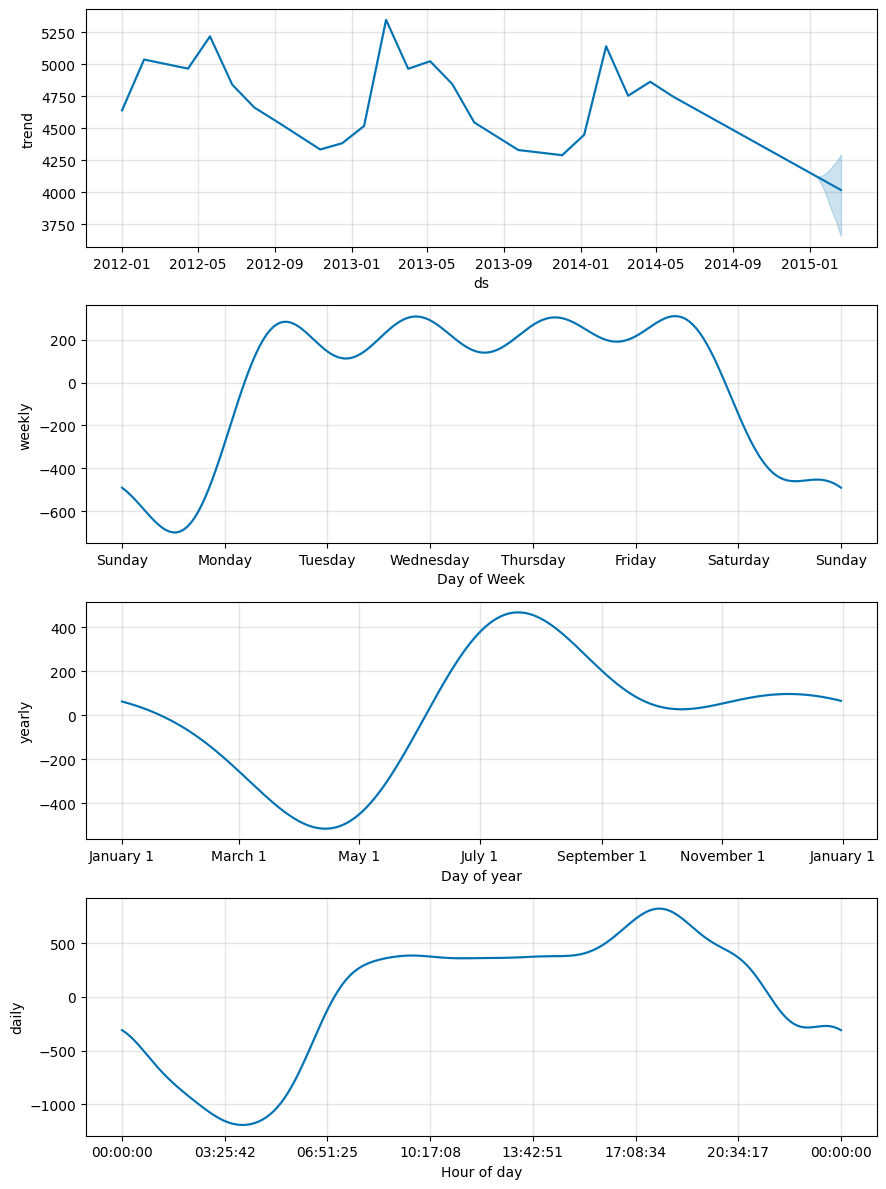

In [47]:
elec = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/vic_elec.csv')
elec['ds'] = pd.to_datetime(elec['Time'], format='mixed')
elec['y'] = elec['Demand']
elec = elec[['ds','y']]

pro = Prophet(
    weekly_seasonality=5,
    yearly_seasonality=3,
    daily_seasonality=10,
)
pro.fit(elec)

future = pro.make_future_dataframe(periods=50)
forecast = pro.predict(future)

plt.figure(figsize=(10, 6))
plt.plot(elec['ds'], elec['y'], color='black')
plt.legend()
plt.show()
fig = pro.plot_components(forecast)

## 비교: ARIMA, ETS, Prophet

### 필요한 패키지 불러오기

In [48]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### 데이터 전처리

In [49]:
aus_prod = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_production.csv')
aus_prod['y'] = aus_prod['Cement']
aus_prod['ds'] = pd.date_range(start='2/3/1956',periods=218, freq='3MS')
aus_prod = aus_prod[['y', 'ds']]
aus_prod = aus_prod[aus_prod['ds']>='1988-01-01']
df = aus_prod[aus_prod['ds']<='2007-12-31']

### Prophet 예측

In [50]:
pro = Prophet(
    weekly_seasonality=10,
    yearly_seasonality=2,
    seasonality_mode='multiplicative'
)
pro.fit(df)

future = pro.make_future_dataframe(periods=11, freq='Q')
forecast = pro.predict(future)
result_pro = forecast[forecast['ds']>='2008-01-01']

17:55:14 - cmdstanpy - INFO - Chain [1] start processing
17:55:15 - cmdstanpy - INFO - Chain [1] done processing


### ETS 예측

In [51]:
df_series = pd.Series(list(df['y']), df['ds'])
fit_cem = ETSModel(df_series, trend='add', seasonal='add').fit()
forecast_cem = fit_cem.forecast(10)

### ARIMA 예측

In [52]:
model = auto_arima(df_series, seasonal=True, m=4, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)
predictions = model.predict(n_periods=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1047.603, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1006.810, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=1013.900, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1046.119, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=1044.177, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : AIC=1005.791, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept   : AIC=987.959, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,0,2)[4] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(1,0,2)[4] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(2,0,1)[4] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(2,0,1)[4] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,1)(2,0,1)[4] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2

### 시각화

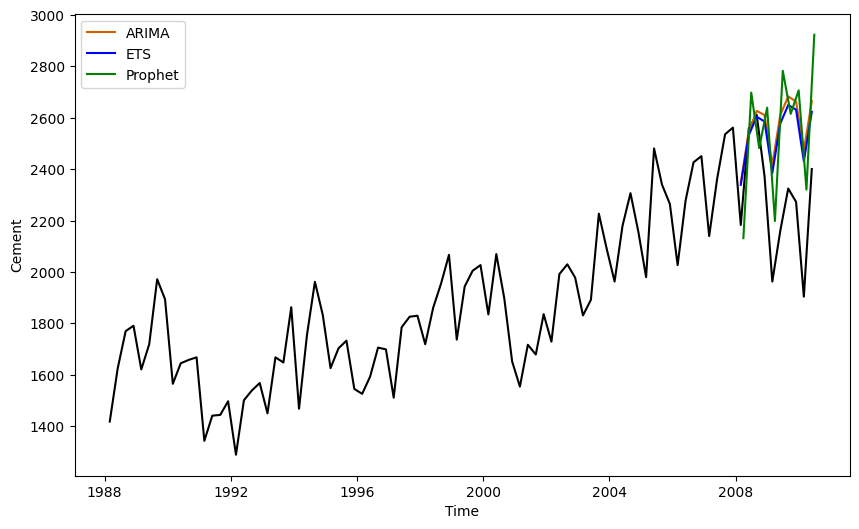

In [53]:
ans = aus_prod[aus_prod['ds'] <= '2010-07-01']

plt.figure(figsize=(10, 6))
plt.plot(ans['ds'], ans['y'], color='black')
plt.plot(predictions, label='ARIMA', color='#D55E00')
plt.plot(forecast_cem, label='ETS', color='b')
plt.plot(result_pro['ds'], result_pro['yhat'], label='Prophet', color='green')
plt.xlabel('Time')
plt.ylabel('Cement')
plt.legend()
plt.show()

### 평가

In [54]:
ans = ans[ans['ds'] >= '2008-01-01']


print(f"ARIMA) MSE: {mean_squared_error(ans['y'], predictions.values)} MAE: {mean_absolute_error(ans['y'], predictions.values)} MAPE: {mean_absolute_percentage_error(ans['y'], predictions.values)}")
print(f"ETS) MSE: {mean_squared_error(ans['y'], forecast_cem.values)} MAE: {mean_absolute_error(ans['y'], forecast_cem.values)} MAPE: {mean_absolute_percentage_error(ans['y'], forecast_cem.values)}")
print(f"Prophet) MSE: {mean_squared_error(ans['y'], result_pro['yhat'])} MAE: {mean_absolute_error(ans['y'], result_pro['yhat'])} MAPE: {mean_absolute_percentage_error(ans['y'], result_pro['yhat'])}")

ARIMA) MSE: 116817.13719524941 MAE: 291.6181773537507 MAPE: 0.13608994125357982
ETS) MSE: 98468.17003401078 MAE: 267.58776888273917 MAPE: 0.1249872783215507
Prophet) MSE: 127377.28883601798 MAE: 311.067972210829 MAPE: 0.1401375824491196
